In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.dpi'] = 110
plt.style.use('ggplot')
path = r"D:\SMIT\Data sets\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)

In [4]:
# just checking if the dataset was set or not
print(df.sample)
print("-------------------------------------------------")
#checking if need for data cleaning or not
print("Missing Values: \n", df.isnull().sum())
print("-------------------------------------------------")
print("\nShape of the data set: ",df.shape)
print("-------------------------------------------------")

<bound method NDFrame.sample of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [5]:
#Data Cleaning
"""So basically I have witnessed there are some decimal values in the age and age should not be in deciaml and we want a visual representation for the data provided.
SO, breaking rhem into chunks would be a better option like giving them a range like 0-17, 18-34,etc.. The decimal values will no be cleaned.
Also, there are 201 null values in BMI with need to be handled as well; I have taken the median of the gender and age bin bmis and then fill them to their respective gender and age_bin. 
Making the stroke 0,1 as int so that it is not boolean values (so that plotting is easeir)."""

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Replace 'unknown' with 'Unknown', replacing with lower-case as it is better practice to do so 
df['smoking_status'] = df['smoking_status'].replace('unknown', 'Unknown')

# Create age bins for imputation
df['age_bin'] = pd.cut(df['age'], bins=[0,18,35,50,65,120],
                       labels=['0-17','18-34','35-49','50-64','65+'])

# Fill missing BMI values with group median (future-safe and warning-free)
df['bmi'] = df.groupby(['gender', 'age_bin'], observed=True)['bmi'].transform(lambda x: x.fillna(x.median()))
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Convert stroke to numeric
df['stroke_flag'] = df['stroke'].astype(int)

# Drop remaining nulls (if any)
df.dropna(inplace=True)

print("After Cleaning:", df.shape)
df.head()


After Cleaning: (5110, 14)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin,stroke_flag
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65+,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.0,never smoked,1,50-64,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,65+,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,35-49,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,65+,1


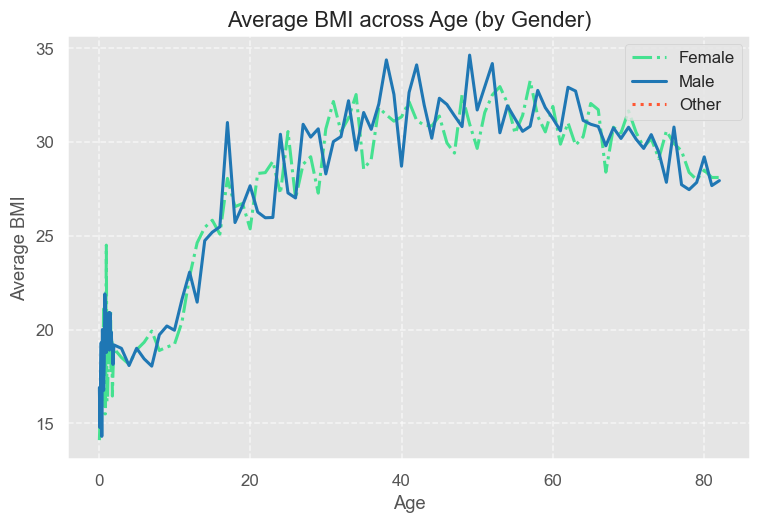

In [7]:
# Group data by age and gender
age_gender_bmi = df.groupby(['age', 'gender'])['bmi'].mean().reset_index()

# Define colors and line styles for each gender
colors = ['#45E190', '#1F77B4', '#FF5733']
line_styles = ['dashdot', 'solid', 'dotted']

# Plot each gender separately
plt.figure(figsize=(8,5))
for i, gender in enumerate(age_gender_bmi['gender'].unique()):
    subset = age_gender_bmi[age_gender_bmi['gender'] == gender]
    plt.plot(subset['age'], subset['bmi'],
             label=f"{gender}",
             color=colors[i % len(colors)],
             linestyle=line_styles[i % len(line_styles)],
             linewidth=2)

# Add title and labels
plt.title('Average BMI across Age (by Gender)')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.legend(loc='upper right', frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


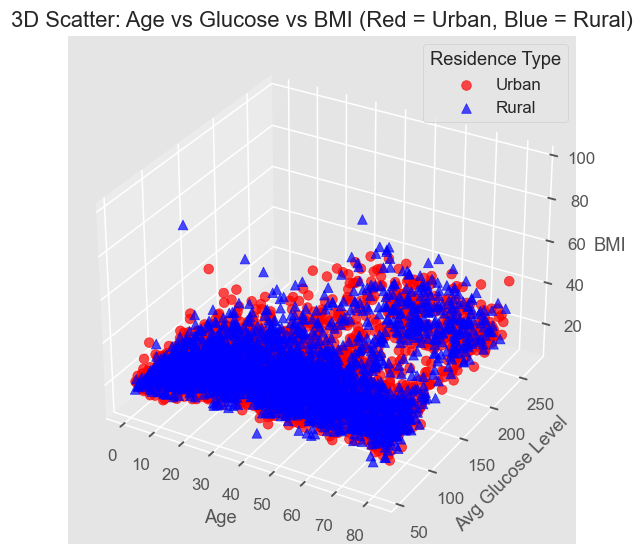

In [9]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
residence_colors = {'Urban': 'red', 'Rural': 'blue'}
markers = {'Urban': 'o', 'Rural': '^'}
for residence in df['Residence_type'].unique():
    subset = df[df['Residence_type'] == residence]
    ax.scatter(subset['age'], subset['avg_glucose_level'], subset['bmi'],
               color=residence_colors.get(residence, 'gray'),
               alpha=0.7, s=40,
               marker=markers.get(residence, 'o'),
               label=residence)

ax.set_xlabel('Age')
ax.set_ylabel('Avg Glucose Level')
ax.set_zlabel('BMI')

plt.title('3D Scatter: Age vs Glucose vs BMI (Red = Urban, Blue = Rural)')
legend = plt.legend(loc='best', frameon=True)
legend.set_title("Residence Type")

plt.show()

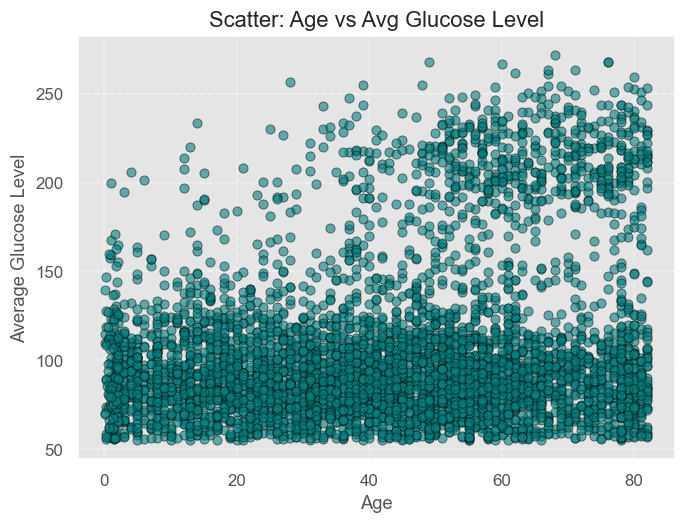

Total number of people who did NOT have a stroke: 4861
Total number of people who DID have a stroke: 249


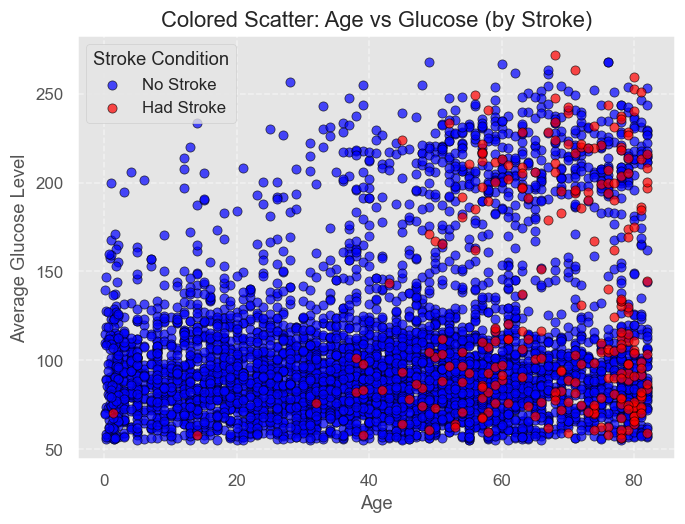

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df['age'], df['avg_glucose_level'], alpha=0.6, color='teal', edgecolors='black', linewidth=0.5)
plt.title('Scatter: Age vs Avg Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Count of Stroke and No Stroke
no_stroke_count = (df['stroke_flag'] == 0).sum()
stroke_count = (df['stroke_flag'] == 1).sum()
print("Total number of people who did NOT have a stroke:", no_stroke_count)
print("Total number of people who DID have a stroke:", stroke_count)

# Colored Scatter Plot (by Stroke)
plt.figure(figsize=(7,5))
for flag, color, label in zip([0, 1], ['blue', 'red'], ['No Stroke', 'Had Stroke']):
    subset = df[df['stroke_flag'] == flag]
    plt.scatter(subset['age'], subset['avg_glucose_level'],
                color=color, alpha=0.7, label=label, edgecolors='black', linewidth=0.5)

plt.title('Colored Scatter: Age vs Glucose (by Stroke)')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(title='Stroke Condition')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

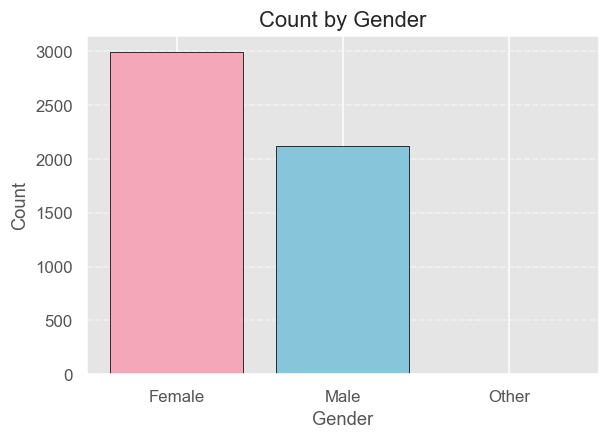

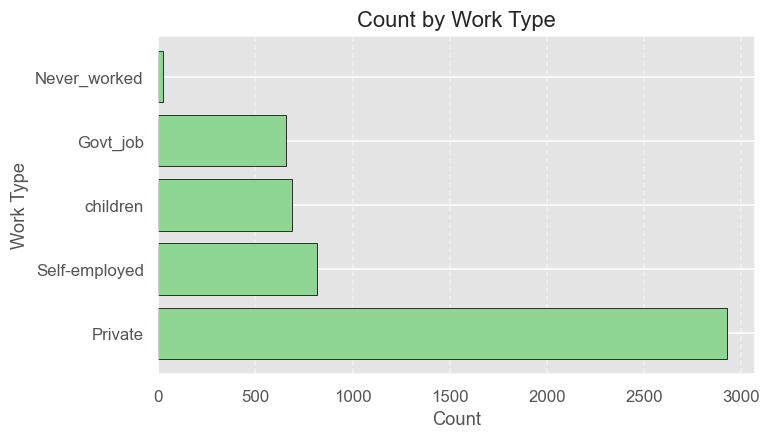

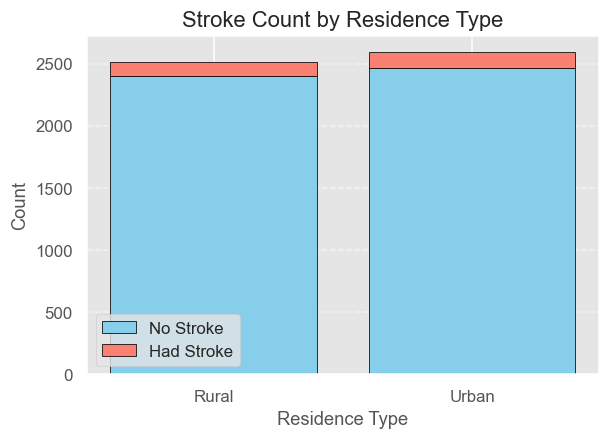

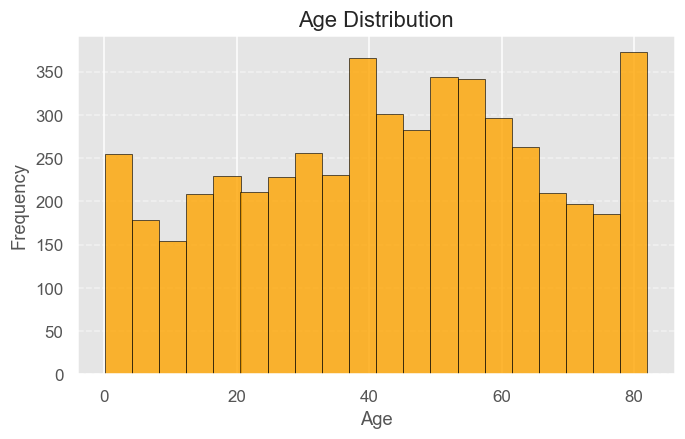

In [11]:
gender_counts = df['gender'].value_counts()
# A bar chart consisting of gender set at x, count at y.
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=['#F4A7B9', '#86C5DA', '#BBBBBB'], edgecolor='black')
plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Work Type Count Plot, I have implemeted horizontal bar chart
work_counts = df['work_type'].value_counts()

plt.figure(figsize=(7,4))
plt.barh(work_counts.index, work_counts.values, color='#8FD694', edgecolor='black')
plt.title('Count by Work Type')
plt.xlabel('Count')
plt.ylabel('Work Type')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Stacked Bar Chart: Stroke vs Residence Type, A comparission chart
cross_tab = pd.crosstab(df['Residence_type'], df['stroke_flag'])

# Extract counts
labels = cross_tab.index
no_stroke = cross_tab[0]
had_stroke = cross_tab[1]

bar_width = 0.5
plt.figure(figsize=(6,4))
plt.bar(labels, no_stroke, label='No Stroke', color='skyblue', edgecolor='black')
plt.bar(labels, had_stroke, bottom=no_stroke, label='Had Stroke', color='salmon', edgecolor='black')

plt.title('Stroke Count by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Histogram of Age, since age is a numeric column.

plt.figure(figsize=(7,4))
plt.hist(df['age'], bins=20, color='orange', edgecolor='black', alpha=0.8)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

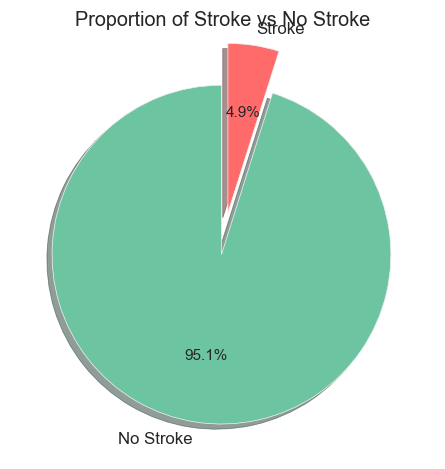

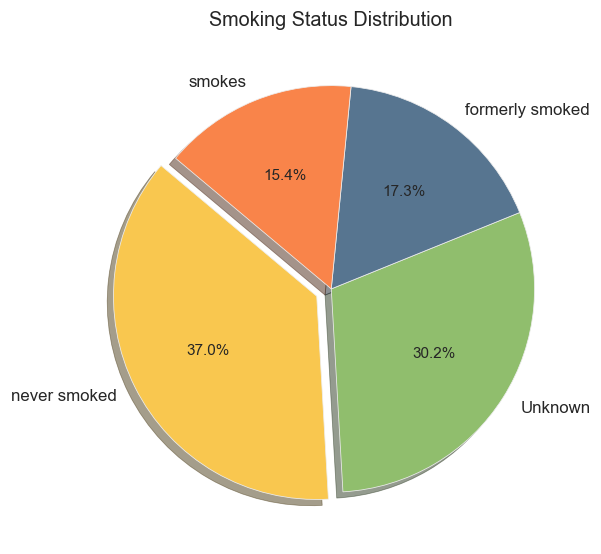

In [12]:
# Count how many people had a stroke vs did not
stroke_counts = df['stroke_flag'].value_counts()

plt.figure(figsize=(5,5))

# Create pie chart for stroke data
plt.pie(stroke_counts,
        labels=['No Stroke', 'Stroke'],   # Labels for each section
        autopct='%1.1f%%',                # Display percentage values
        explode=[0.05, 0.2],              # Slightly separate the slices for effect
        shadow=True,                      # Add a soft shadow for 3D appearance
        startangle=90,                    # Rotate chart to start at the top
        colors=['#6CC4A1', '#FF6B6B'])    # Custom colors (green = healthy, red = stroke)

plt.title('Proportion of Stroke vs No Stroke', fontsize=13)
plt.show()


# Smoking Status Pie Chart

# Count how many people fall under each smoking category
smoke_counts = df['smoking_status'].value_counts()

# Slightly "explode" (separate) the 'never smoked' section to highlight it
explode = [0.08 if x == 'never smoked' else 0 for x in smoke_counts.index]

plt.figure(figsize=(6,6))

# Create pie chart for smoking data
plt.pie(smoke_counts,
        labels=smoke_counts.index,        # Use category names as labels
        autopct='%1.1f%%',                # Show percentage values
        explode=explode,                  # Separate one slice for emphasis
        shadow=True,                      # Add soft drop shadow
        startangle=140,                   # Adjust rotation for a clean start
        colors=['#F9C74F', '#90BE6D', '#577590', '#F9844A'])  

plt.title('Smoking Status Distribution', fontsize=13)
plt.show()

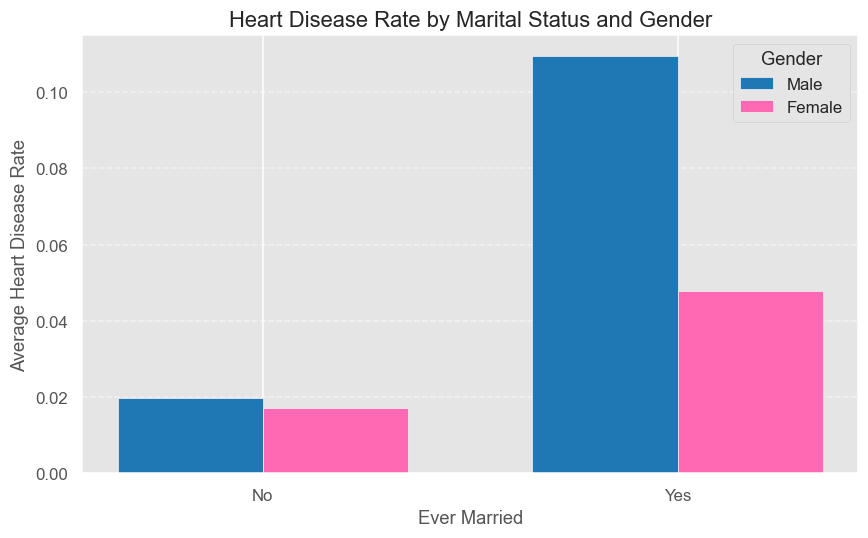

In [14]:
# Calculate mean heart disease rate grouped by marital status and gender
heart_data = df.groupby(['ever_married', 'gender'])['heart_disease'].mean().unstack()

# Create positions for grouped bars
x = np.arange(len(heart_data.index))  
bar_width = 0.35                     

# Create the plot
plt.figure(figsize=(8,5))

# Bar for males
plt.bar(x - bar_width/2,
        heart_data['Male'],
        width=bar_width,
        color='#1F77B4',
        label='Male')

# Bar for females
plt.bar(x + bar_width/2,
        heart_data['Female'],
        width=bar_width,
        color='#FF69B4',
        label='Female')

plt.title('Heart Disease Rate by Marital Status and Gender')
plt.xlabel('Ever Married')
plt.ylabel('Average Heart Disease Rate')
plt.xticks(x, heart_data.index)         
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [76]:
print("="*80)
print("📊 GENERAL INSIGHTS FROM HEALTHCARE STROKE DATASET")
print("="*80)

print("\n🧓 Age & Stroke:")
print("• Stroke risk rises sharply with age. Most stroke cases occur in people above 50 years old.")
print("• Older individuals also tend to have higher glucose levels, BMI, hypertension, and heart disease.")

print("\n⚧ Gender:")
print("• Males generally show slightly higher rates of heart disease and stroke compared to females.")
print("• Females dominate the dataset overall, but male health risks increase earlier with age.")

print("\n💓 Hypertension & Heart Disease:")
print("• Both conditions strongly correlate with stroke occurrence.")
print("• People with hypertension are far more likely to have heart disease or stroke.")
print("• The combination of heart disease and hypertension dramatically increases stroke probability.")

print("\n💍 Ever Married:")
print("• Most married individuals fall into older age brackets, explaining higher rates of stroke and heart disease.")
print("• Unmarried people, being younger on average, show fewer health complications.")

print("\n💼 Work Type:")
print("• The majority work in private jobs, followed by self-employed and government workers.")
print("• 'Children' and 'Never_worked' categories belong to younger groups with very low stroke incidence.")
print("• Lifestyle and work stress factors may influence BMI and glucose variation across work types.")

print("\n🏠 Residence Type:")
print("• The dataset is evenly split between Urban and Rural populations.")
print("• Urban residents show slightly higher average glucose and BMI values — possibly due to dietary habits.")
print("• Stroke distribution is nearly equal across both residence types.")

print("\n🩸 Average Glucose Level & BMI:")
print("• Both are key numeric indicators strongly tied to stroke and heart disease.")
print("• High glucose and high BMI combinations appear frequently in stroke cases.")
print("• Glucose level tends to increase with age, while BMI varies more by lifestyle and work type.")

print("\n🚬 Smoking Status:")
print("• 'Never smoked' is the largest group, followed by 'formerly smoked' and 'smokes'.")
print("• Smokers and former smokers display slightly higher glucose and BMI levels, linking to greater stroke risk.")
print("• 'Unknown' entries may represent missing or unrecorded lifestyle data.")

print("\n⚠️ Stroke & Stroke Flag:")
print("• Only about 5% of the population experienced a stroke — indicating class imbalance.")
print("• Stroke cases cluster among older, hypertensive, heart-disease, and high-glucose individuals.")
print("• Stroke_flag = 1 represents stroke cases, while 0 indicates healthy individuals.")

print("\n🧠 Overall Insight:")
print("• Age, hypertension, heart disease, and glucose are the strongest stroke predictors.")
print("• Gender, marriage, work type, residence, BMI, and smoking add contextual lifestyle impact.")
print("• The dataset clearly shows how aging and chronic conditions interact to raise stroke risk.")
print("="*80)


📊 GENERAL INSIGHTS FROM HEALTHCARE STROKE DATASET

🧓 Age & Stroke:
• Stroke risk rises sharply with age. Most stroke cases occur in people above 50 years old.
• Older individuals also tend to have higher glucose levels, BMI, hypertension, and heart disease.

⚧ Gender:
• Males generally show slightly higher rates of heart disease and stroke compared to females.
• Females dominate the dataset overall, but male health risks increase earlier with age.

💓 Hypertension & Heart Disease:
• Both conditions strongly correlate with stroke occurrence.
• People with hypertension are far more likely to have heart disease or stroke.
• The combination of heart disease and hypertension dramatically increases stroke probability.

💍 Ever Married:
• Most married individuals fall into older age brackets, explaining higher rates of stroke and heart disease.
• Unmarried people, being younger on average, show fewer health complications.

💼 Work Type:
• The majority work in private jobs, followed by self-emplo